In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_pd = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_pd = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
#use filename.columns to see what are the columns labels and how to combine our 2 csv datas
#mouse_drug_pd.columns = "Mouse Id, Drug"
#clinical_trial_pd.columns = "Mouse ID, Timepoint, Tumor Volume(mm3), Metastatic Sites"
#https://datacarpentry.org/python-ecology-lesson/05-merging-data/
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
combine_clinical_data = pd.merge(clinical_trial_pd, mouse_drug_pd, how="left", on="Mouse ID")

# Display the data table for preview
combine_clinical_data.head()


## what is the difference between  file1. merge(file2, how...)
## or pd.merge(file1, file2, ....detail needed)
## More detail question on joins -- to ask tutor when school assign one!  

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#mean_tumor_response = combine_mouse_clinical_data.loc[:, ["Drug", "Timepoint"]]
mean_tumor_response = combine_clinical_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_response_df = pd.DataFrame(mean_tumor_response)
mean_tumor_response_df.reset_index(inplace = True)

# Preview DataFrame
mean_tumor_response_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and TImepoint
volume_standard_error = combine_clinical_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
volume_standard_error_df = pd.DataFrame(volume_standard_error)

# Preview DataFrame
volume_standard_error_df.head(6)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642

In [23]:
# Minor Data Munging to Re-Format the Data Frames
#https://www.youtube.com/watch?v=LFDAQfN0L9k - data munging study
#https://www.youtube.com/watch?v=XDAnFZqJDvI
#https://www.youtube.com/watch?v=9d5-Ti6onew -- stack and unstack data
#https://www.datacamp.com/community/tutorials/pandas-multi-index
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html 
#https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/
reformat_tumor_data = mean_tumor_response_df.pivot_table(index='Timepoint', columns= 'Drug', values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
reformat_tumor_data.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
#reformat standard error before we can plot our line graph 
reformat_standard_error = volume_standard_error_df.pivot_table(index="Timepoint", columns='Drug', values="Tumor Volume (mm3)")
reformat_standard_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [26]:
# need to reset the index before plotting the graph 
reformat_tumor_data.reset_index(inplace=True)

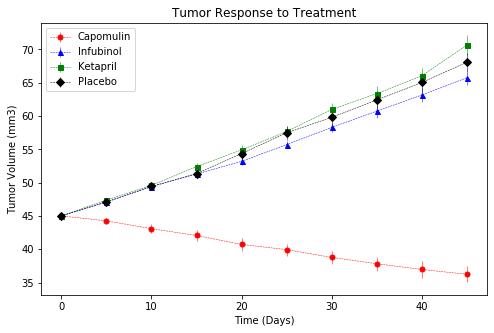

In [27]:
# Generate the Plot (with Error Bars)
# https://stackoverflow.com/questions/52035184/pandas-plot-line-graph-with-both-error-bars-and-markers
# matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html
# Plot only these specific drugs Capomulin, Infubinol, Ketapril, Placebo
# matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers == markers
# matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html == adding legend to graph

#define our x axis // note: y axis is each individual drugs name and value to use for plotting 

# plot error bars
plt.figure(figsize =(8,5))
plt.errorbar(reformat_tumor_data["Timepoint"], reformat_tumor_data["Capomulin"], yerr=reformat_standard_error["Capomulin"], 
             color ='r', linestyle='--', marker='o', markersize=5, linewidth =0.5, label="Capomulin")
plt.errorbar(reformat_tumor_data["Timepoint"], reformat_tumor_data["Infubinol"], yerr=reformat_standard_error["Infubinol"],
            color ='b', linestyle='--', marker="^", markersize=5, linewidth =0.5, label="Infubinol")
plt.errorbar(reformat_tumor_data["Timepoint"], reformat_tumor_data["Ketapril"], yerr=reformat_standard_error["Ketapril"],
            color ='g', linestyle='--', marker='s', markersize=5, linewidth =0.5, label="Ketapril")
plt.errorbar(reformat_tumor_data["Timepoint"], reformat_tumor_data["Placebo"], yerr=reformat_standard_error["Placebo"],
            color ='black', linestyle='--', marker='D', markersize=5,linewidth=0.5, label="Placebo")

plt.legend(loc='upper left')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [28]:
# Save the Figure
plt.savefig('tumor_response.png')

<Figure size 432x288 with 0 Axes>

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [29]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_response = combine_clinical_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_response_df = pd.DataFrame(mean_met_response)

# Preview DataFrame
mean_met_response_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [30]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_error = combine_clinical_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_standard_error_df = pd.DataFrame(met_standard_error)

# Preview DataFrame
met_standard_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [31]:
# Minor Data Munging to Re-Format the Data Frames
# pivot mean met response
mean_met_response_df.reset_index(inplace = True)
mean_met_pivot = mean_met_response_df.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
mean_met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [32]:
#drop the dataframe index and reformat the DataFrames into a pivot table 
met_standard_error_df.reset_index(inplace=True)
met_standard_error_pivot = met_standard_error_df.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites")

#preview that reformatting worked
met_standard_error_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


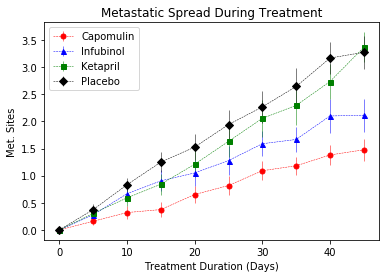

In [33]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_pivot["Capomulin"].index, mean_met_pivot["Capomulin"], yerr=met_standard_error_pivot["Capomulin"],
            color ='r', linestyle='--', marker='o', markersize=5, linewidth =0.5, label="Capomulin")
plt.errorbar(mean_met_pivot["Infubinol"].index, mean_met_pivot["Infubinol"], yerr=met_standard_error_pivot["Infubinol"],
            color ='b', linestyle='--', marker="^", markersize=5, linewidth =0.5, label="Infubinol")
plt.errorbar(mean_met_pivot["Ketapril"].index, mean_met_pivot["Ketapril"], yerr=met_standard_error_pivot["Ketapril"],
             color ='g', linestyle='--', marker='s', markersize=5, linewidth =0.5, label="Ketapril")
plt.errorbar(mean_met_pivot["Placebo"].index, mean_met_pivot["Placebo"], yerr=met_standard_error_pivot["Placebo"],
            color ='black',linestyle='--', marker='D', markersize=5, linewidth =0.5, label="Placebo")

plt.legend(loc='upper left')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig('Metastatic_spread.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [34]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combine_clinical_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
mice_count_df.reset_index(inplace=True)

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [35]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot = mice_count_df.pivot_table(index="Timepoint", columns="Drug", values="Mouse ID")

# Preview the Data Frame
mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [36]:
# Reset the index and pivot only the 4 drugs  
mice_pivot.reset_index(inplace=True)

In [44]:
#Pull 4 drugs table to compute the %
mice_count_fourdrugs = mice_pivot[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mice_count_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


In [38]:
# set our columns data as type float 
fourdrugs_survival = mice_count_fourdrugs.astype(float)

# find the percentage before we plot 
# youtube.com/watch?v=P_q0tkYqvSk - how do I apply a function to a panda Series or DataFrame
fourdrugs_survival.loc[:, "Capomulin":"Placebo"] = fourdrugs_survival.loc[:, "Capomulin":"Placebo"].apply(lambda x : x/x[0] * 100, axis=0)
fourdrugs_survival.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0.0,100.0,100.0,100.0,100.0
1,5.0,100.0,100.0,92.0,96.0
2,10.0,100.0,84.0,88.0,96.0
3,15.0,96.0,84.0,76.0,80.0
4,20.0,92.0,80.0,76.0,76.0


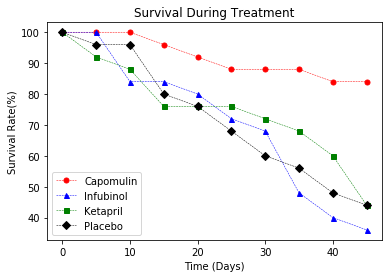

In [39]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(fourdrugs_survival["Timepoint"], fourdrugs_survival["Capomulin"],
            color ='r', marker='o', markersize=5, linestyle='--', linewidth =0.5, label="Capomulin")
plt.errorbar(fourdrugs_survival["Timepoint"], fourdrugs_survival["Infubinol"],
            color ='b', marker="^", markersize=5, linestyle='--', linewidth =0.5, label="Infubinol")
plt.errorbar(fourdrugs_survival["Timepoint"], fourdrugs_survival["Ketapril"],
            color ='g', marker='s', markersize=5, linestyle='--', linewidth =0.5, label="Ketapril")
plt.errorbar(fourdrugs_survival["Timepoint"], fourdrugs_survival["Placebo"],
            color ='black', marker='D', markersize=5, linestyle='--', linewidth =0.5, label="Placebo")

plt.legend(loc='lower left')
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")

# Save the Figure
plt.savefig('survival_rate.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [40]:
# https://www.youtube.com/watch?v=MSXGbXJiTt4
four_drugs_volume = reformat_tumor_data[["Capomulin", "Infubinol","Ketapril", "Placebo"]]
# Calculate the percent changes for each drug
tumor_percent_volume_change = ((four_drugs_volume.iloc[-1] - four_drugs_volume.iloc[0]) / four_drugs_volume.iloc[0]) * 100
tumor_percent_volume_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [41]:
# set drugs name as index 
drugs_index = (tumor_percent_volume_change.index)

# Store all Relevant Percent Changes into a Tuple - numpy array 
drugs_volume = (tumor_percent_volume_change.values)

# Splice the data between passing and failing drugs
# Use list comprehension to set the pass fail creteria to determine our bar color
# stackoverflow.com/questions/4260280/if-else-in-a-list-comprehension
pass_fail = ['g' if volume_drugs < 0 else 'r' for volume_drugs in drugs_volume]

# matplotlib.org/3.1.1/galeries/lines_bars_and_markers/barchart.html
# https://stackoverflow.com/questions/54727603/how-to-align-the-bars-in-a-bar-chart-between-ticks-matplotlib
x_axis = np.arange(len(drugs_index))


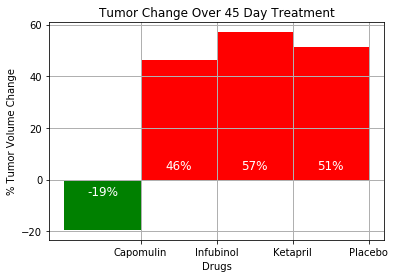

In [42]:
# Plot our bar graph 
drugs_bar = plt.bar(x_axis, drugs_volume, color = pass_fail, align = "edge", width = 1)
plt.grid(True, linewidth = 1)

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.yticks([-20, 0, 20, 40, 60])

# https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
# rename the ticks to match drugs label 
plt.xticks([1, 2, 3, 4], ["Capomulin", "Infubinol","Ketapril", "Placebo"])

# reformat our data label 
#https://stackoverflow.com/questions/52823128/unsupported-format-string-passed-to-numpy-ndarray
label = list(map('{:.0f}%'.format,tumor_percent_volume_change))

# Use functions to label the percentages of changes
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = int(drugs_volume[i])
        if height <= 0:
            plt.text(rect.get_x() + rect.get_width()/2., -2, (label[i]),
                    ha ="center", va="top", color="white", size="12")
        else:
            plt.text(rect.get_x() + rect.get_width()/2., 8, (label[i]),
                    ha ="center", va="top", color="white", size="12")

# Call functions to implement the function calls
autolabel(drugs_bar)

# Save the Figure
plt.savefig("Tumor % Volume Change")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)